In [1]:
# pip3 install pycaret
# 官方：https://www.pycaret.org

# 文档：https://pycaret.readthedocs.io/en/latest/

# git：https://www.github.com/pycaret/pycaret

# 参考demo：https://www.kaggle.com/code/frtgnn/pycaret-introduction-classification-regression/notebook


### 分类

In [2]:
import pandas as pd
train = pd.read_csv('01.泰坦尼克幸存者 源码Titanic-Machine Learning from Disaster/titanic/train.csv')
test  = pd.read_csv('01.泰坦尼克幸存者 源码Titanic-Machine Learning from Disaster/titanic/test.csv')
sub   = pd.read_csv('01.泰坦尼克幸存者 源码Titanic-Machine Learning from Disaster/titanic/gender_submission.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 导入分类模型
from pycaret.classification import *

In [5]:
# 查看数据类型
setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],
             silent = True)

,Description,Value
0,session_id,5731
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


('lightgbm',
 'lightgbm',
 'box-cox',
            Age        Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  SibSp_0  \
 659  58.000000  113.275002       1.0       0.0       0.0         0.0      1.0   
 580  25.000000   30.000000       0.0       1.0       0.0         1.0      0.0   
 329  16.000000   57.979198       1.0       0.0       0.0         1.0      1.0   
 376  22.000000    7.250000       0.0       0.0       1.0         1.0      1.0   
 41   27.000000   21.000000       0.0       1.0       0.0         1.0      0.0   
 ..         ...         ...       ...       ...       ...         ...      ...   
 100  28.000000    7.895800       0.0       0.0       1.0         1.0      1.0   
 511  29.422272    8.050000       0.0       0.0       1.0         0.0      1.0   
 293  24.000000    8.850000       0.0       0.0       1.0         1.0      1.0   
 873  47.000000    9.000000       0.0       0.0       1.0         0.0      1.0   
 571  53.000000   51.479198       1.0       0.0       0.0   

In [6]:
# 运行&对比精度
compare_models(errors = "raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8153,0.8630,0.7085,0.8079,0.7481,0.6041,0.6134,0.0810
lda,Linear Discriminant Analysis,0.8105,0.8580,0.7088,0.7933,0.7420,0.5940,0.6025,0.0110
ridge,Ridge Classifier,0.8089,0.0000,0.7088,0.7896,0.7405,0.5909,0.5991,0.0030
gbc,Gradient Boosting Classifier,0.8073,0.8723,0.6802,0.8069,0.7326,0.5844,0.5943,0.0230
lr,Logistic Regression,0.8072,0.8566,0.7210,0.7815,0.7427,0.5898,0.5982,0.4040
rf,Random Forest Classifier,0.7942,0.8599,0.7040,0.7627,0.7268,0.5629,0.5690,0.1120
xgboost,Extreme Gradient Boosting,0.7927,0.8544,0.7002,0.7588,0.7248,0.5595,0.5638,0.1660
ada,Ada Boost Classifier,0.7879,0.8356,0.7380,0.7291,0.7295,0.5558,0.5606,0.0170
dt,Decision Tree Classifier,0.7783,0.7691,0.7048,0.7361,0.7155,0.5346,0.5394,0.0030
et,Extra Trees Classifier,0.7718,0.8291,0.7087,0.7186,0.7085,0.5221,0.5271,0.1040


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5731, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [7]:
# 创建单个模型
lgbm  = create_model('lightgbm')   

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9453,0.8400,0.8750,0.8571,0.7663,0.7667
1,0.8095,0.8516,0.6800,0.8095,0.7391,0.5909,0.5965
2,0.8254,0.9211,0.7600,0.7917,0.7755,0.6328,0.6331
3,0.8548,0.8308,0.6800,0.9444,0.7907,0.6840,0.7057
4,0.8065,0.8054,0.6250,0.8333,0.7143,0.5724,0.5860
5,0.8065,0.8865,0.6250,0.8333,0.7143,0.5724,0.5860
6,0.8065,0.8366,0.8333,0.7143,0.7692,0.6043,0.6096
7,0.7903,0.8235,0.5417,0.8667,0.6667,0.5253,0.5562
8,0.7581,0.8421,0.7083,0.6800,0.6939,0.4940,0.4943


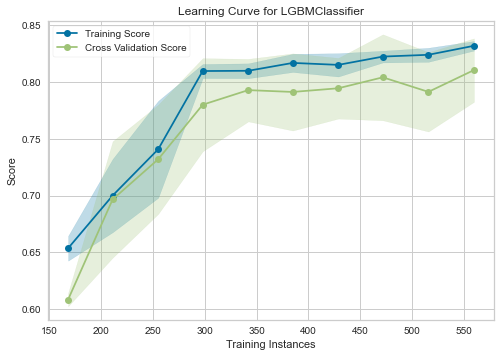

In [8]:
# 对单个模型进行调参
tuned_lightgbm = tune_model(lgbm)
plot_model(estimator = tuned_lightgbm, plot = 'learning')

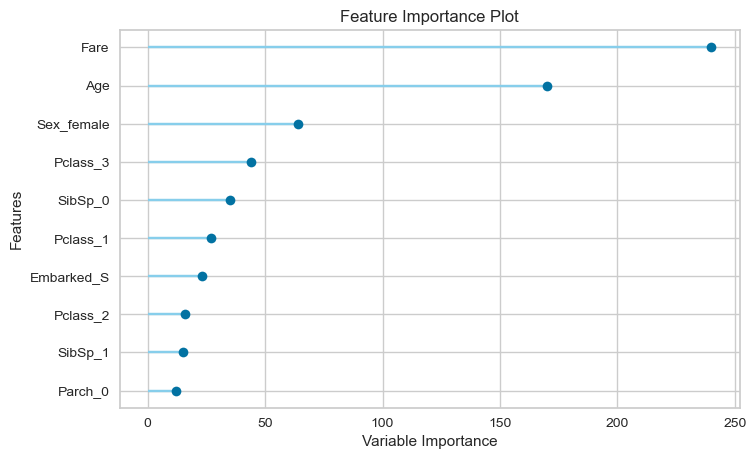

In [9]:
# 打印重要性
plot_model(estimator = tuned_lightgbm, plot = 'feature')

In [10]:
# 对测试机进行预测
predict_model(tuned_lightgbm, data=test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.8626
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.5971
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.8659
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.8443
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.5402
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.9407
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9403
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.9243
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.9407


### 回归

In [11]:
train = pd.read_csv('02房价预测 kaggle/input/train.csv')
test  = pd.read_csv('02房价预测 kaggle/input/test.csv')
sample= pd.read_csv('02房价预测 kaggle/input/sample_submission.csv')

In [12]:
# 导入回归模型
from pycaret.regression import *

In [13]:
setup(data = train, 
             target = 'SalePrice',
             numeric_imputation = 'mean',
             categorical_features = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType',
                                     'Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',   
                                     'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',    
                                     'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',   
                                     'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',   
                                     'Electrical','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                                     'SaleCondition']  , 
             ignore_features = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],
             normalize = True,
             silent = True)

,Description,Value
0,session_id,5967
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,55
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 388)"


('lightgbm',
 'lightgbm',
 'box-cox',
        LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
 1316 -4.141911e-01 -0.033507   1.193683      1.097784    0.919748   -0.956700   
 1325 -1.357758e+00 -0.686789  -1.658359     -1.728307   -0.590009   -0.956700   
 1129 -4.591228e-01 -0.333481   0.265111     -0.266536    0.416496    1.035434   
 116  -6.782177e-08  0.104287  -0.331828     -1.143599    0.058628   -0.594881   
 1390 -9.805236e-03 -0.145130   0.928377      0.707979    0.774364    2.022988   
 ...            ...       ...        ...           ...         ...         ...   
 327   4.395123e-01  0.102701  -0.398154     -1.241050    0.388537    0.245817   
 1047 -5.939181e-01 -0.130756   0.729397      0.464350   -0.590009    0.503347   
 599  -2.076666e+00 -0.853926   0.265111     -0.266536   -0.590009   -0.784304   
 839  -9.805236e-03  0.119256  -0.862440      0.464350   -0.590009   -0.207521   
 643   4.395123e-01  0.022701  -0.099685     -0.802519    0.

In [14]:
# 运行&对比精度
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,17997.2454,941547596.3889,30397.3424,0.8427,0.1486,0.1040,0.1960
gbr,Gradient Boosting Regressor,17804.9372,962086003.0850,30426.1294,0.8344,0.1445,0.1027,0.2090
rf,Random Forest Regressor,19282.8200,1097280766.7460,32585.2578,0.8147,0.1585,0.1124,0.4370
par,Passive Aggressive Regressor,16783.7968,1138211602.6192,31887.8588,0.8045,0.1417,0.0974,0.2370
huber,Huber Regressor,16864.4459,1142920285.3308,31315.5948,0.8018,0.1537,0.0993,0.2280
xgboost,Extreme Gradient Boosting,19760.2733,1244514357.7500,34623.4080,0.7974,0.1544,0.1098,0.4870
br,Bayesian Ridge,19129.3634,1330903210.6590,34715.3323,0.7714,0.1634,0.1125,0.2100
ada,AdaBoost Regressor,26077.8565,1468795793.8722,37982.7564,0.7566,0.2057,0.1655,0.1940
et,Extra Trees Regressor,22273.8228,1473826162.2707,37880.3423,0.7504,0.1776,0.1260,0.5080
ridge,Ridge Regression,20149.9272,1448648841.7655,35936.8439,0.7504,0.1712,0.1192,0.0710


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5967, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [15]:
lgb = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14461.6159,448754922.3975,21183.8363,0.9301,0.1409,0.0984
1,19373.2611,1269874594.2559,35635.2998,0.8573,0.1355,0.0890
2,18589.4527,970342981.0597,31150.3287,0.8366,0.1471,0.1091
3,17202.2972,899815864.5781,29996.9309,0.8268,0.1433,0.0976
4,18145.4926,979298832.1736,31293.7507,0.8671,0.1691,0.1144
5,18213.6521,1131986856.9464,33645.0124,0.8704,0.1346,0.0974
6,20328.7009,967205301.8969,31099.9245,0.8275,0.1586,0.1117
7,18784.0796,802096854.4659,28321.3145,0.8368,0.1445,0.1040
8,17110.6945,677652371.9929,26031.7570,0.8720,0.1582,0.1105


In [16]:
tuned_lgb = tune_model(lgb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19560.1740,751584826.9012,27415.0475,0.8829,0.1716,0.1304
1,23140.7488,1546013028.3915,39319.3722,0.8263,0.1603,0.1130
2,18897.5835,932387462.8447,30535.0203,0.8430,0.1451,0.1093
3,21542.5458,1061383397.2509,32578.8796,0.7956,0.1618,0.1207
4,20182.4528,1272315367.6745,35669.5300,0.8274,0.1838,0.1272
5,20512.2492,1611892827.8902,40148.3851,0.8155,0.1501,0.1123
6,21206.4908,1393147876.5645,37324.8962,0.7515,0.1718,0.1206
7,18700.8102,674166316.7912,25964.7129,0.8628,0.1566,0.1145
8,17916.9615,691070383.1727,26288.2176,0.8695,0.1598,0.1148


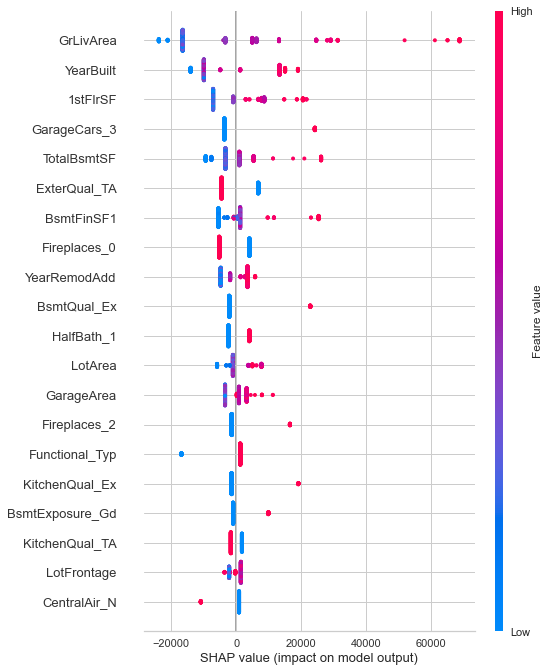

In [17]:
# 模型特征重要程度
interpret_model(tuned_lgb)

In [18]:
predictions = predict_model(tuned_lgb, data = test)
sample['SalePrice'] = predictions['Label']
sample.to_csv('submission_house_price.csv',index=False)
sample.head()

,Id,SalePrice
0,1461,114686.222720
1,1462,161929.184154
2,1463,200119.605032
3,1464,192265.683727
4,1465,186678.807033
